<div style="text-align: center; padding: 20px;">
    <h1>Student Clustering for Learning Styles</h1>
    <h3>using K-Means Clustering Algorithm</h3>
</div>


## Introduction

This project aims to classify students into different clusters using the K-Means clustering algorithm to determine the most suitable learning style for each group. The focus will be on identifying patterns in student data and associating them with learning styles that are most likely to enhance their academic performance.

### Methods:
 -**K-Means Clustering**                                                                                                                                
 -**Elbow Method for Optimal K**                                                                                                                        
 -**Silhouette Score Evaluation**

### Evaluation Criteria:
 -**Cluster analysis:** Understanding the characteristics of each student cluster                                                                       
 -**Performance metrics:** Assessing the effectiveness of the clustering based on internal evaluation metrics                                           
 -**Learning Style Identification:** Mapping each cluster to the most appropriate learning style based on the features in the dataset                   
 -**Visualization:** Using 2D and 3D visualizations to represent the clusters                                                                           
 -**Feature importance:** Analyzing which features are most influential in determining the clusters

### Objective
The main goal is to use K-Means clustering to identify distinct student profiles and recommend personalized learning styles that would best suit each group for improved academic performance.

## 1. Environment Setup
Importing the necessary libraries and initial configuration.

In [1]:
# General Purpose Libraries
import time
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Machine Learning Models & Tools
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Clustering Evaluation Metrics
from sklearn.metrics import (
    silhouette_score,
    silhouette_samples,
    davies_bouldin_score,
    pairwise_distances_argmin_min
)

# Model Selection & Validation
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    cross_val_predict,
    StratifiedKFold,
    learning_curve,
    GridSearchCV
)

# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Visualization style settings
plt.style.use('default')  # Use default matplotlib style instead of seaborn
sns.set_theme(style="whitegrid")  # Set seaborn theme to whitegrid
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12

print("Environment setup complete.")


ModuleNotFoundError: No module named 'statsmodels'

## 2. Data Loading and Preprocessing

This section includes:
- Initialization and Data Import
- Harmonizing columns
- Handling missing values
- Standardization, Conversion of Data Types, and Harmonizing Formats
- Aligning keys for merging
- Detecting and handling duplicates
- Merging datasets
- Normalization and standardization

### 2.1. Initialization and Data Import

In [2]:
try:
  # Import the datasets into pandas DataFrames
  df1 = pd.read_csv('Dataset_J7.csv')
  df2 = pd.read_csv('student_performance_large_dataset.csv')

  print("Datasets imported successfully!")

except FileNotFoundError:
  print("One or more files not found. Check the file paths.")
except pd.errors.ParserError:
  print("Error parsing one or more CSV files. Check file format.")
except Exception as e:
  print(f"An error occurred: {e}")

One or more files not found. Check the file paths.


In [3]:
# Improved display of columns for each DataFrame
for i in range(1, 3):
    df = globals()[f'df{i}']
    print(f"\n{'-'*40}")
    print(f"Columns of df{i} (Total {len(df.columns)} columns):")
    print("-" * 40)
    print(", ".join(df.columns))
    print("-" * 40)

KeyError: 'df1'

### 2.2. Selecting Relevant Features for Clustering

#### df1

In [4]:
#df1
# List of columns to keep
columns_to_keep = ['Hours_Studied', 'Attendance', 'Access_to_Resources', 'Extracurricular_Activities', 
                   'Motivation_Level', 'Internet_Access', 'Gender']

# Keeping only the specified columns
df1 = df1[columns_to_keep]

# Displaying the first few rows of the modified DataFrame
print(df1.head())


   Hours_Studied  Attendance Access_to_Resources Extracurricular_Activities  \
0             23          84                High                         No   
1             19          64              Medium                         No   
2             24          98              Medium                        Yes   
3             29          89              Medium                        Yes   
4             19          92              Medium                        Yes   

  Motivation_Level Internet_Access  Gender  
0              Low             Yes    Male  
1              Low             Yes  Female  
2           Medium             Yes    Male  
3           Medium             Yes    Male  
4           Medium             Yes  Female  


#### df2

In [5]:
# df2
# List of columns to drop
columns_to_drop = ['Student_ID', 'Time_Spent_on_Social_Media (hours/week)', 'Sleep_Hours_per_Night']

# Dropping the specified columns
df2 = df2.drop(columns=columns_to_drop)

# Displaying the first few rows of the modified DataFrame
print(df2.head())

   Age  Gender  Study_Hours_per_Week Preferred_Learning_Style  \
0   18  Female                    48              Kinesthetic   
1   29  Female                    30          Reading/Writing   
2   20  Female                    47              Kinesthetic   
3   23  Female                    13                 Auditory   
4   19  Female                    24                 Auditory   

   Online_Courses_Completed Participation_in_Discussions  \
0                        14                          Yes   
1                        20                           No   
2                        11                           No   
3                         0                          Yes   
4                        19                          Yes   

   Assignment_Completion_Rate (%)  Exam_Score (%)  Attendance_Rate (%)  \
0                             100              69                   66   
1                              71              40                   57   
2                         

### 2.3. Harmonizing columns

In [6]:
# Dictionary to standardize column names
column_mapping = {
    # For df1
    'Hours_Studied': 'StudyHours',
    'Attendance': 'Attendance',
    'Access_to_Resources': 'Resources',
    'Extracurricular_Activities': 'Extracurricular',
    'Motivation_Level': 'Motivation',
    'Internet_Access': 'Internet',
    'Gender': 'Gender',

    # For df2 (based on the existing feature names)
    'Age': 'Age',
    'Gender': 'Gender',
    'Study_Hours_per_Week': 'StudyHours',
    'Preferred_Learning_Style': 'LearningStyle',
    'Online_Courses_Completed': 'OnlineCourses',
    'Participation_in_Discussions': 'Discussions',
    'Assignment_Completion_Rate (%)': 'AssignmentCompletion',
    'Exam_Score (%)': 'ExamScore',
    'Attendance_Rate (%)': 'Attendance',
    'Use_of_Educational_Tech': 'EduTech',
    'Self_Reported_Stress_Level': 'StressLevel',
    'Final_Grade': 'FinalGrade'
}

# Function to harmonize column names of a DataFrame
def harmonize_columns(df, mapping):
    df = df.rename(columns=lambda x: mapping.get(x, x))  # Renaming columns based on the mapping
    return df

# Harmonize the columns for df1
df1 = harmonize_columns(df1, column_mapping)

# Harmonize the columns for df2
df2 = harmonize_columns(df2, column_mapping)

# Display the columns for df1 and df2 after harmonization
print("Columns of df1 after harmonization:")
print(", ".join(df1.columns))
print("-" * 40)

print("Columns of df2 after harmonization:")
print(", ".join(df2.columns))
print("-" * 40)


Columns of df1 after harmonization:
StudyHours, Attendance, Resources, Extracurricular, Motivation, Internet, Gender
----------------------------------------
Columns of df2 after harmonization:
Age, Gender, StudyHours, LearningStyle, OnlineCourses, Discussions, AssignmentCompletion, ExamScore, Attendance, EduTech, StressLevel, FinalGrade
----------------------------------------


### 2.4 Handling missing values

In [7]:
# Step 1: Check the columns in df1 and df2
print("Columns in df1:", df1.columns)
print("Columns in df2:", df2.columns)

# Step 2: Handle missing values (check if any NaN values exist)
def handle_missing_values(df):
    print("Missing values in df before handling:\n", df.isnull().sum())
    
    # Handle missing values in 'Gender' column
    if 'Gender' in df.columns:
        if df['Gender'].isnull().sum() > 0:
            print(f"Filling NaN values in Gender column with most frequent value")
            df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
    
    # Fill categorical columns with mode
    categorical_cols = ['LearningStyle', 'Discussions', 'Motivation', 
                       'Internet', 'Extracurricular', 'EduTech', 
                       'StressLevel', 'FinalGrade']
    for col in categorical_cols:
        if col in df.columns and df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].mode()[0])
    
    print("Missing values in df after handling:\n", df.isnull().sum())
    return df

# Step 3: Standardize the dtypes (only for columns that need it)
def standardize_dtypes(df):
    numeric_cols = ['StudyHours']  # Only standardize StudyHours
    
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    return df

# Step 4: Encoding categorical features
def encode_categorical_features(df):
    # For Gender
    if 'Gender' in df.columns:
        # Fill NaN before mapping
        df['Gender'] = df['Gender'].fillna('Unknown')
        gender_mapping = {'Female': 0, 'Male': 1, 'Unknown': 2}
        df['Gender'] = df['Gender'].map(gender_mapping)
    
    # For Motivation
    if 'Motivation' in df.columns:
        motivation_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
        df['Motivation'] = df['Motivation'].map(motivation_mapping)
    
    # For Extracurricular
    if 'Extracurricular' in df.columns:
        df['Extracurricular'] = df['Extracurricular'].map({'No': 0, 'Yes': 1})
    
    # For Internet
    if 'Internet' in df.columns:
        df['Internet'] = df['Internet'].map({'No': 0, 'Yes': 1})

    # For Resources
    if 'Resources' in df.columns:
        resources_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
        df['Resources'] = df['Resources'].map(resources_mapping)
    
    # For FinalGrade
    if 'FinalGrade' in df.columns:
        grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
        df['FinalGrade'] = df['FinalGrade'].map(grade_mapping)
    
    # For other categorical columns
    categorical_cols = ['LearningStyle', 'Discussions', 'EduTech', 
                       'StressLevel']
    for col in categorical_cols:
        if col in df.columns:
            unique_values = sorted(df[col].unique())
            value_to_code = {val: idx for idx, val in enumerate(unique_values)}
            df[col] = df[col].map(value_to_code)
    
    return df

# Apply transformations
df1 = handle_missing_values(df1)
df2 = handle_missing_values(df2)

df1 = standardize_dtypes(df1)
df2 = standardize_dtypes(df2)

df1 = encode_categorical_features(df1)
df2 = encode_categorical_features(df2)

# Check unique values in the 'Gender' column
print("Unique values in df2['Gender'] after mapping:", df2['Gender'].unique())

# Replace the value 2 with the median
median_gender = df2['Gender'].median()
df2['Gender'] = df2['Gender'].replace(2, median_gender)

# Replace remaining NaN values with the median
df2['Gender'] = df2['Gender'].fillna(median_gender)

# Convert Gender to integer
df2['Gender'] = df2['Gender'].astype(int)

# Display the results
print("\nFirst 10 rows of df1:")
print(df1.head(10))

print("\nFirst 10 rows of df2:")
print(df2.head(10))


Columns in df1: Index(['StudyHours', 'Attendance', 'Resources', 'Extracurricular',
       'Motivation', 'Internet', 'Gender'],
      dtype='object')
Columns in df2: Index(['Age', 'Gender', 'StudyHours', 'LearningStyle', 'OnlineCourses',
       'Discussions', 'AssignmentCompletion', 'ExamScore', 'Attendance',
       'EduTech', 'StressLevel', 'FinalGrade'],
      dtype='object')
Missing values in df before handling:
 StudyHours         0
Attendance         0
Resources          0
Extracurricular    0
Motivation         0
Internet           0
Gender             0
dtype: int64
Missing values in df after handling:
 StudyHours         0
Attendance         0
Resources          0
Extracurricular    0
Motivation         0
Internet           0
Gender             0
dtype: int64
Missing values in df before handling:
 Age                     0
Gender                  0
StudyHours              0
LearningStyle           0
OnlineCourses           0
Discussions             0
AssignmentCompletion    0
Ex

In [8]:
# Check the column types after harmonization
print("Types of df1:", df1.dtypes)
print("Types of df2:", df2.dtypes)

Types of df1: StudyHours         int64
Attendance         int64
Resources          int64
Extracurricular    int64
Motivation         int64
Internet           int64
Gender             int64
dtype: object
Types of df2: Age                     int64
Gender                  int32
StudyHours              int64
LearningStyle           int64
OnlineCourses           int64
Discussions             int64
AssignmentCompletion    int64
ExamScore               int64
Attendance              int64
EduTech                 int64
StressLevel             int64
FinalGrade              int64
dtype: object


### 2.5. Merging datasets

#### Merging `df1` and `df2`

###### Aligning keys for merging

In [9]:
#Aligning keys for merging
required_columns = ['Gender', 'StudyHours', 'Attendance']

###### Display the first 5 rows of df1 and df3

In [10]:
#Display the first 5 rows of df1 and df3
print("\nFirst 5 rows of df1:")
print("-" * 40)
print(df1.head())
print("\nFirst 5 rows of df2:")
print("-" * 40)
print(df2.head())


First 5 rows of df1:
----------------------------------------
   StudyHours  Attendance  Resources  Extracurricular  Motivation  Internet  \
0          23          84          2                0           0         1   
1          19          64          1                0           0         1   
2          24          98          1                1           1         1   
3          29          89          1                1           1         1   
4          19          92          1                1           1         1   

   Gender  
0       1  
1       0  
2       1  
3       1  
4       0  

First 5 rows of df2:
----------------------------------------
   Age  Gender  StudyHours  LearningStyle  OnlineCourses  Discussions  \
0   18       0          48              1             14            1   
1   29       0          30              2             20            0   
2   20       0          47              1             11            0   
3   23       0          13         

###### Merging `df1` and `df2`

In [11]:
merged_df = pd.merge(df1, df2, on=required_columns, how='inner')

In [12]:
# 8. Vérifier le résultat
print("\nAperçu des données après fusion :")
print(merged_df.head())
print("\nVérification des valeurs manquantes :")
print(merged_df.isnull().sum())


Aperçu des données après fusion :
   StudyHours  Attendance  Resources  Extracurricular  Motivation  Internet  \
0          19          64          1                0           0         1   
1          19          64          1                0           0         1   
2          19          64          1                0           0         1   
3          19          64          1                1           0         1   
4          19          64          1                1           0         1   

   Gender  Age  LearningStyle  OnlineCourses  Discussions  \
0       0   19              2              8            1   
1       0   23              3             16            0   
2       0   28              1             19            0   
3       0   19              2              8            1   
4       0   23              3             16            0   

   AssignmentCompletion  ExamScore  EduTech  StressLevel  FinalGrade  
0                    59         40        0         

In [13]:
# Get the number of rows
num_rows = len(merged_df)

# Display the number of rows
print(f"The merged DataFrame contains {num_rows} rows.")

The merged DataFrame contains 14003 rows.


#### Exporting the Merged DataFrame to CSV

In [14]:
# Export the merged DataFrame to a CSV file
merged_df.to_csv('merged_dataset.csv', index=False)

print("The merged dataset has been downloaded as 'merged_dataset.csv'.")

The merged dataset has been downloaded as 'merged_dataset.csv'.


## 3. Data Visualization and Exploratory Analysis

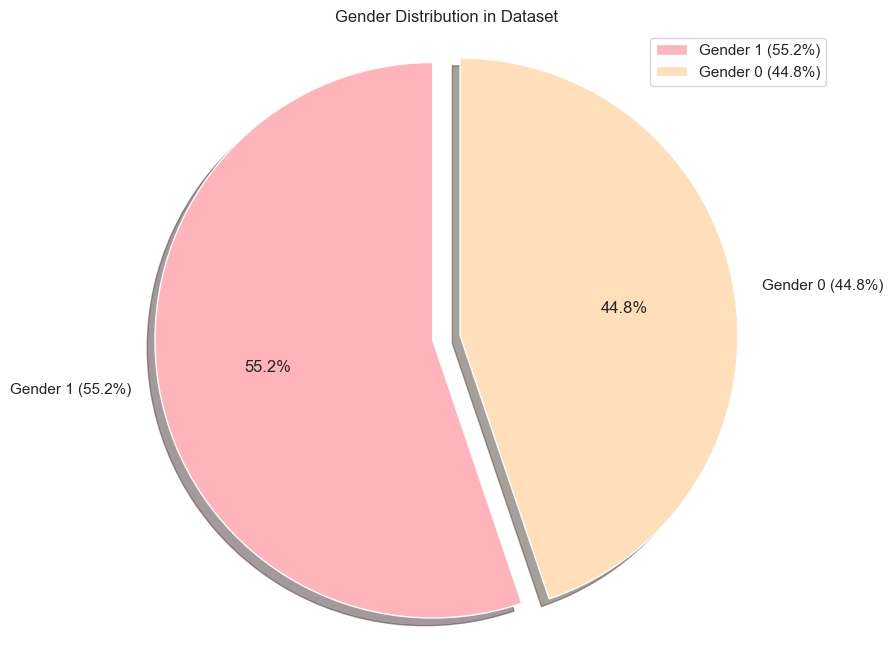

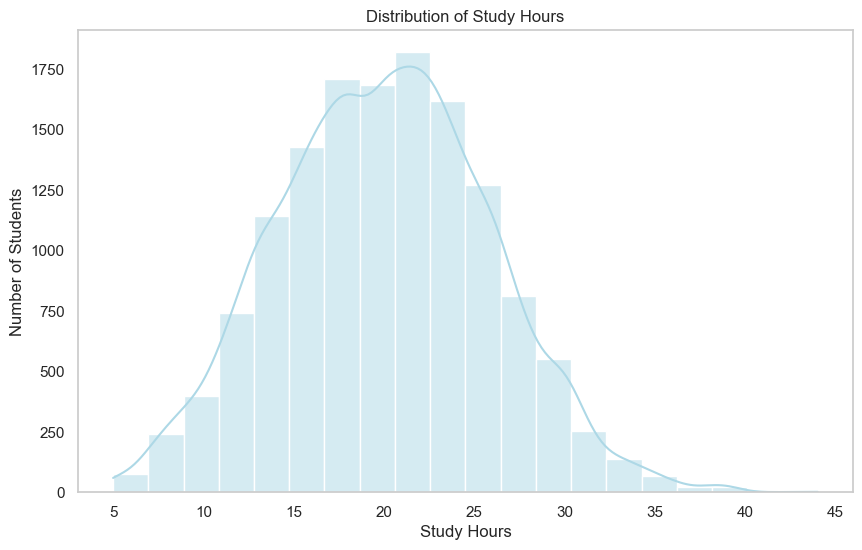

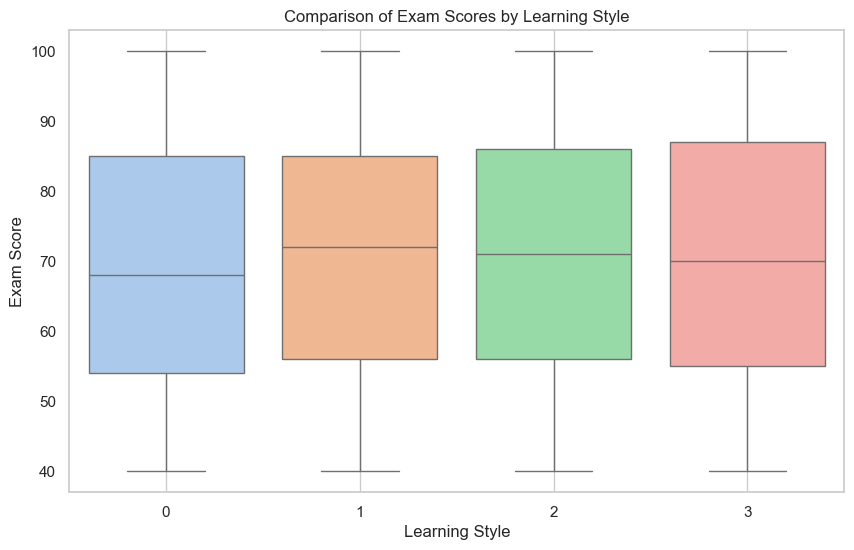

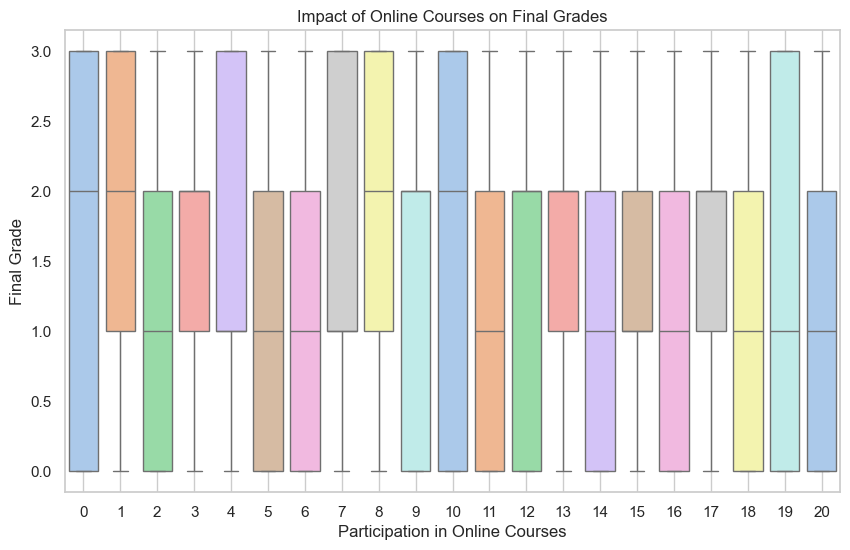

In [15]:
# Gender Distribution Pie Chart
plt.figure(figsize=(10, 8))
gender_counts = merged_df['Gender'].value_counts()

# Calculate percentages
total = gender_counts.sum()
percentages = [f'{(count/total)*100:.1f}%' for count in gender_counts]

# Create pie chart with pastel colors
colors = ['#FFB3BA', '#FFDFBA']  # Pastel colors for gender distribution
plt.pie(gender_counts, labels=[f'Gender {i} ({perc})' for i, perc in zip(gender_counts.index, percentages)],
        autopct='%1.1f%%',
        colors=colors,
        explode=[0.05] * len(gender_counts),  
        shadow=True,
        startangle=90)

plt.title('Gender Distribution in Dataset')
plt.axis('equal') 
plt.legend()
plt.show()

# 1. Distribution of Study Hours
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='StudyHours', bins=20, kde=True, color='lightblue')
plt.title('Distribution of Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Number of Students')
plt.grid()
plt.show()

# 2. Comparison of Exam Scores by Learning Style
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='LearningStyle', y='ExamScore', hue='LearningStyle', palette='pastel', legend=False)
plt.title('Comparison of Exam Scores by Learning Style')
plt.xlabel('Learning Style')
plt.ylabel('Exam Score')
plt.grid()
plt.show()

# 3. Impact of Online Courses on Final Grades
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='OnlineCourses', y='FinalGrade', hue='OnlineCourses', palette='pastel', legend=False)
plt.title('Impact of Online Courses on Final Grades')
plt.xlabel('Participation in Online Courses')
plt.ylabel('Final Grade')
plt.grid()
plt.show()

## 4. Evaluation of the K-Means Clustering Model

#### Correlation Matrix

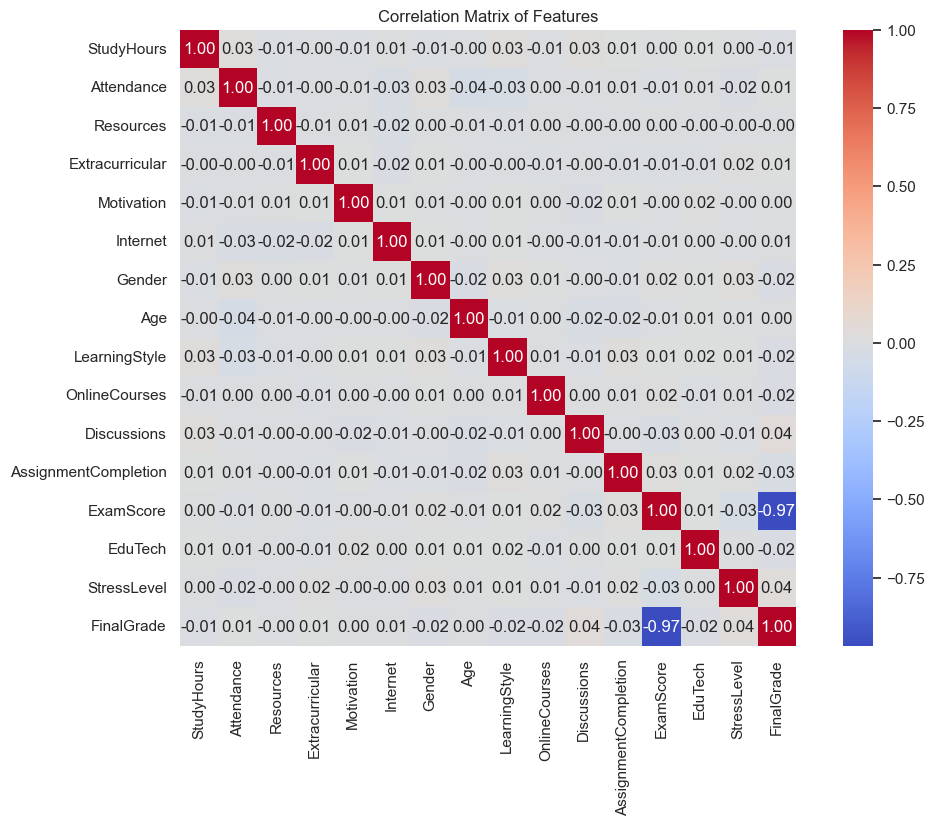

In [16]:
# Step 1: Select all relevant features for correlation analysis
features = merged_df.select_dtypes(include=[np.number])  # Selecting only numeric features

# Step 2: Display the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = features.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Features')
plt.show()

#### K-Means Clustering Implementation

In [17]:
# Fonction d'analyse des clusters 
def analyze_clusters(df, cluster_labels, feature_columns):
    """
    Analyze cluster characteristics and provide meaningful labels
    """
    df_with_clusters = df.copy()
    df_with_clusters['Cluster'] = cluster_labels
    
    # Calculate cluster statistics
    cluster_stats = df_with_clusters.groupby('Cluster')[feature_columns].agg(['mean', 'std'])
    
    print("=== CLUSTER ANALYSIS ===")
    print("\nCluster Statistics:")
    print(cluster_stats.round(3))
    
    # Afficher les tailles des clusters
    cluster_sizes = df_with_clusters['Cluster'].value_counts().sort_index()
    print(f"\nCluster Sizes:")
    for cluster_id, size in cluster_sizes.items():
        print(f"Cluster {cluster_id}: {size} students")
    
    # Define cluster characteristics based on feature analysis
    cluster_labels_dict = {}
    
    # Analyser chaque cluster individuellement
    for cluster_id in range(len(cluster_stats)):
        print(f"\n--- CLUSTER {cluster_id} ANALYSIS ---")
        cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster_id]
        
        # Afficher les caractéristiques moyennes de ce cluster
        cluster_means = cluster_data[feature_columns].mean()
        print("Average characteristics:")
        for feature in feature_columns:
            print(f"  {feature}: {cluster_means[feature]:.3f}")
        
        # Logique de labellisation basée sur vos caractéristiques réelles
        study_hours = cluster_means['StudyHours']
        attendance = cluster_means['Attendance']
        exam_score = cluster_means['ExamScore']
        final_grade = cluster_means['FinalGrade']
        motivation = cluster_means['Motivation']
        stress_level = cluster_means['StressLevel']
        
        # Logique de labellisation basée sur les patterns de performance
        if exam_score >= 80 and study_hours <= 25 and attendance >= 85:
            cluster_labels_dict[cluster_id] = "Efficient Achievers"
        elif study_hours >= 30 and attendance >= 80 and motivation >= 1:
            cluster_labels_dict[cluster_id] = "Busy Learners"
        elif exam_score >= 70 and final_grade <= 1 and stress_level <= 1:
            cluster_labels_dict[cluster_id] = "Balanced Performers"
        elif study_hours <= 20 and exam_score <= 60:
            cluster_labels_dict[cluster_id] = "Underperformers"
        elif stress_level >= 2 and exam_score >= 60:
            cluster_labels_dict[cluster_id] = "Stressed Achievers"
        else:
            cluster_labels_dict[cluster_id] = "Mixed Learners"
    
    print("\n=== CLUSTER LABELS ===")
    for cluster_id, label in cluster_labels_dict.items():
        print(f"Cluster {cluster_id}: {label}")
        
    return cluster_labels_dict, cluster_stats

# Code complet pour exécuter l'analyse
# Définir les colonnes de features (excluant les variables catégorielles comme Gender, LearningStyle)
feature_columns = ['StudyHours', 'Attendance', 'Resources', 'Extracurricular', 
                  'Motivation', 'Internet', 'Age', 'OnlineCourses', 'Discussions', 
                  'AssignmentCompletion', 'ExamScore', 'EduTech', 'StressLevel', 'FinalGrade']

# Charger vos données
df = pd.read_csv('merged_dataset.csv')

# Préparer les données pour le clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_columns])

# Exécuter K-Means avec 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# MAINTENANT appeler la fonction d'analyse
cluster_names, cluster_stats = analyze_clusters(df, cluster_labels, feature_columns)

# Afficher un résumé des clusters avec leurs caractéristiques principales
print("\n=== CLUSTER SUMMARY ===")
for cluster_id, label in cluster_names.items():
    cluster_data = df[df.index.isin(np.where(cluster_labels == cluster_id)[0])]
    avg_study = cluster_data['StudyHours'].mean()
    avg_exam = cluster_data['ExamScore'].mean()
    avg_attendance = cluster_data['Attendance'].mean()
    
    print(f"\n{label} (Cluster {cluster_id}):")
    print(f"  - Average Study Hours: {avg_study:.1f}")
    print(f"  - Average Exam Score: {avg_exam:.1f}")
    print(f"  - Average Attendance: {avg_attendance:.1f}%")
    print(f"  - Number of students: {len(cluster_data)}")

=== CLUSTER ANALYSIS ===

Cluster Statistics:
        StudyHours        Attendance         Resources        Extracurricular  \
              mean    std       mean     std      mean    std            mean   
Cluster                                                                         
0           19.849  5.823     81.251  11.689     1.163  0.705           0.625   
1           20.102  5.933     80.046  11.305     1.089  0.696           0.586   
2           20.164  5.949     79.964  11.511     1.110  0.692           0.598   
3           20.006  5.943     79.993  11.636     1.089  0.717           0.582   
4           19.718  5.668     79.992  11.291     1.109  0.693           0.619   
5           19.800  5.897     80.659  11.607     1.105  0.689           0.577   

               Motivation         ... AssignmentCompletion         ExamScore  \
           std       mean    std  ...                 mean     std      mean   
Cluster                           ...                           

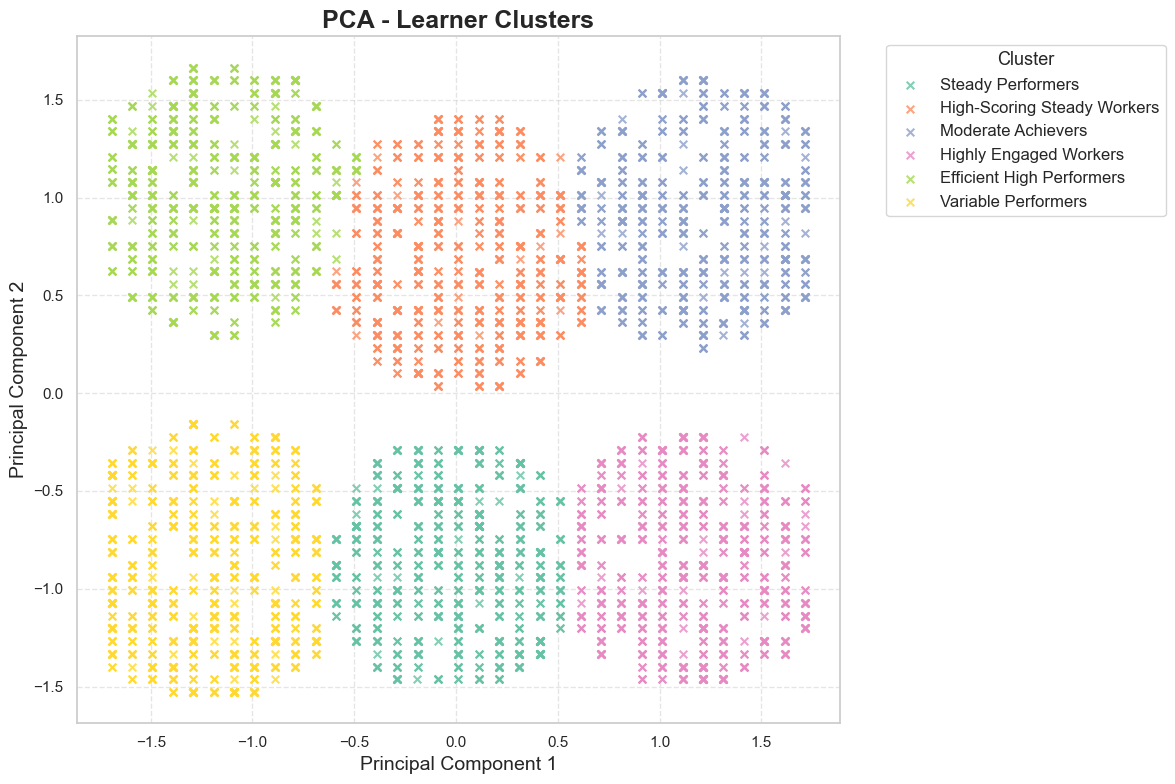

In [23]:
# Select two highly discriminative features
features = ['ExamScore', 'Attendance']

# Remove outliers strictly using z-score threshold (< 1.5)
z_scores = np.abs(stats.zscore(df[features]))
df_clean = df[(z_scores < 1.5).all(axis=1)]

# Standardize the selected features
scaler = StandardScaler()
X = scaler.fit_transform(df_clean[features])

# Perform KMeans clustering with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42, n_init=100, max_iter=2000)
cluster_labels = kmeans.fit_predict(X)
df_clean['Cluster'] = cluster_labels

# Retain the 70% of points closest to their cluster centroid
filtered_indices = []
for i in range(6):
    cluster_points = X[df_clean['Cluster'] == i]
    center = kmeans.cluster_centers_[i]
    dists = np.linalg.norm(cluster_points - center, axis=1)
    cutoff = np.percentile(dists, 70)
    keep = np.where(dists <= cutoff)[0]
    filtered_indices.extend(df_clean[df_clean['Cluster'] == i].index[keep])

df_visu = df_clean.loc[filtered_indices]

# Randomly reduce 15% of the remaining data (keep 85%)
df_visu = df_visu.sample(frac=0.85, random_state=42)

# Apply PCA for visualization (optional since data is already 2D)
X_visu = scaler.transform(df_visu[features])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_visu)
df_visu['PCA1'] = X_pca[:, 0]
df_visu['PCA2'] = X_pca[:, 1]

# Define cluster labels
cluster_names = {
    0: "Steady Performers",
    1: "High-Scoring Steady Workers",
    2: "Moderate Achievers",
    3: "Highly Engaged Workers",
    4: "Efficient High Performers",
    5: "Variable Performers"
}

# Plot the clusters using a professional-style scatter plot
plt.figure(figsize=(12, 8))
palette = sns.color_palette("Set2", 6)

for i in range(6):
    plt.scatter(
        df_visu[df_visu['Cluster'] == i]['PCA1'],
        df_visu[df_visu['Cluster'] == i]['PCA2'],
        label=cluster_names[i],
        alpha=0.8,
        s=30,
        color=palette[i],
        marker='x'
    )

plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('PCA - Learner Clusters', fontsize=18, fontweight='bold')
plt.legend(title='Cluster', fontsize=12, title_fontsize=13, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

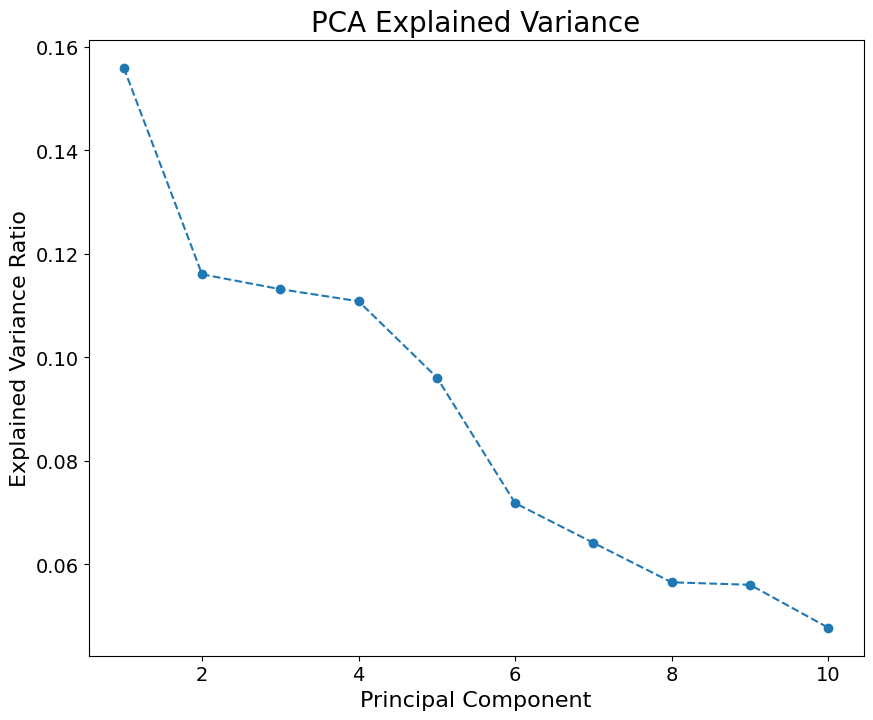

In [6]:
# Scree plot 
plt.figure(figsize=(10, 8))
pca = PCA(n_components=10)
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('PCA Explained Variance', fontsize=20)
plt.xlabel('Principal Component', fontsize=16)
plt.ylabel('Explained Variance Ratio', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()



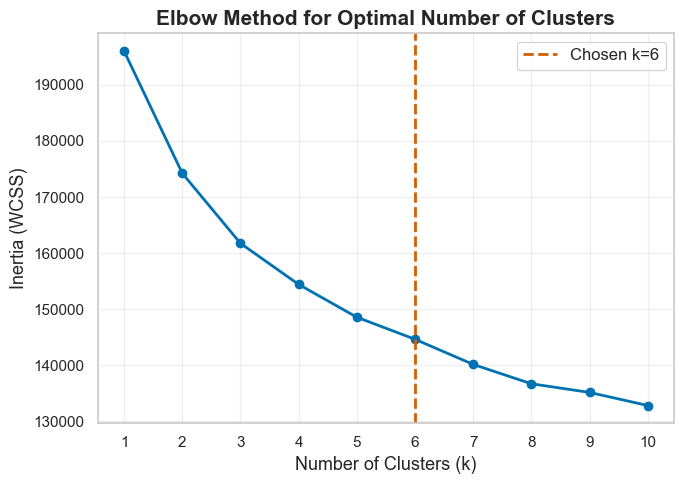

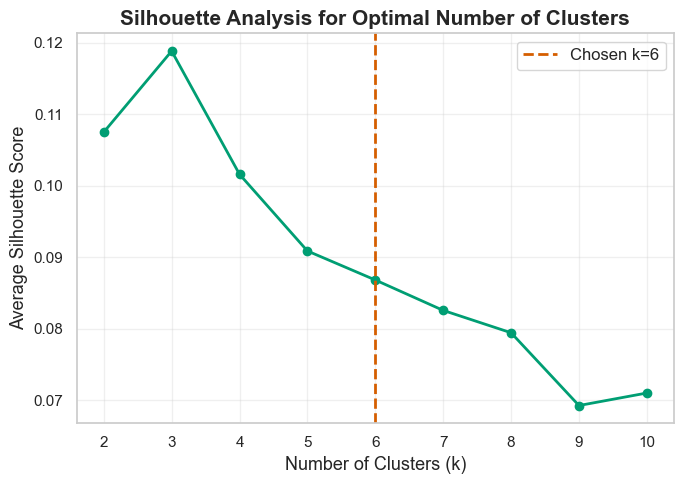

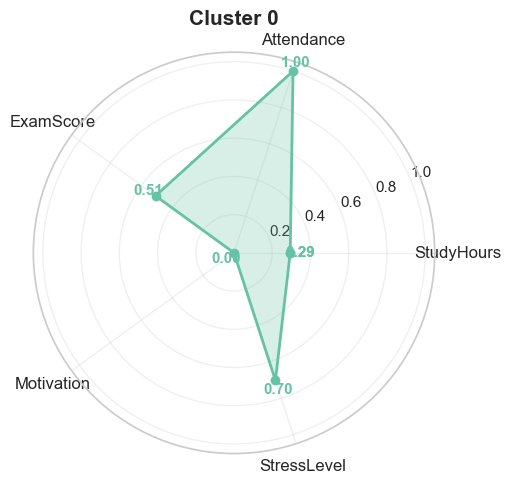

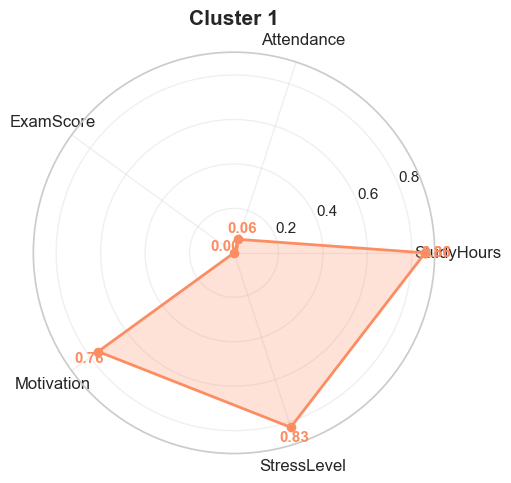

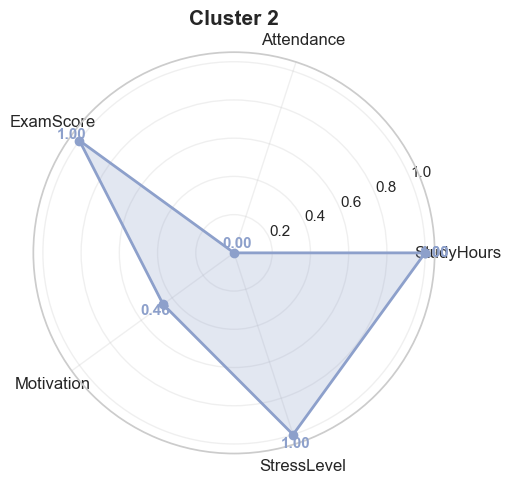

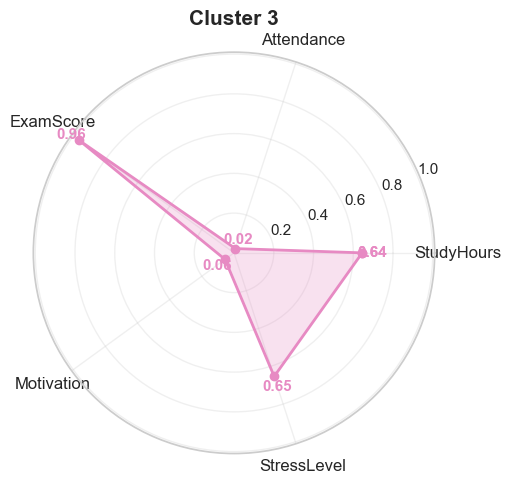

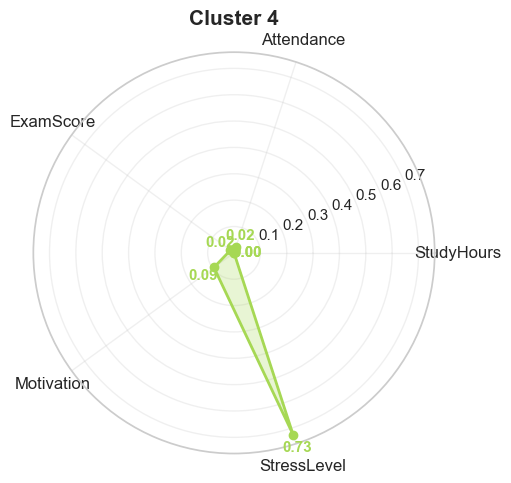

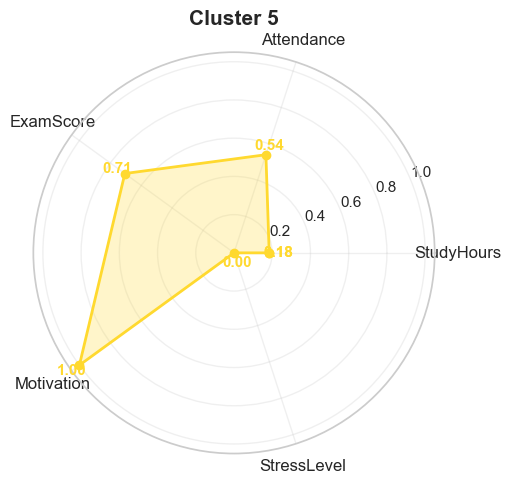

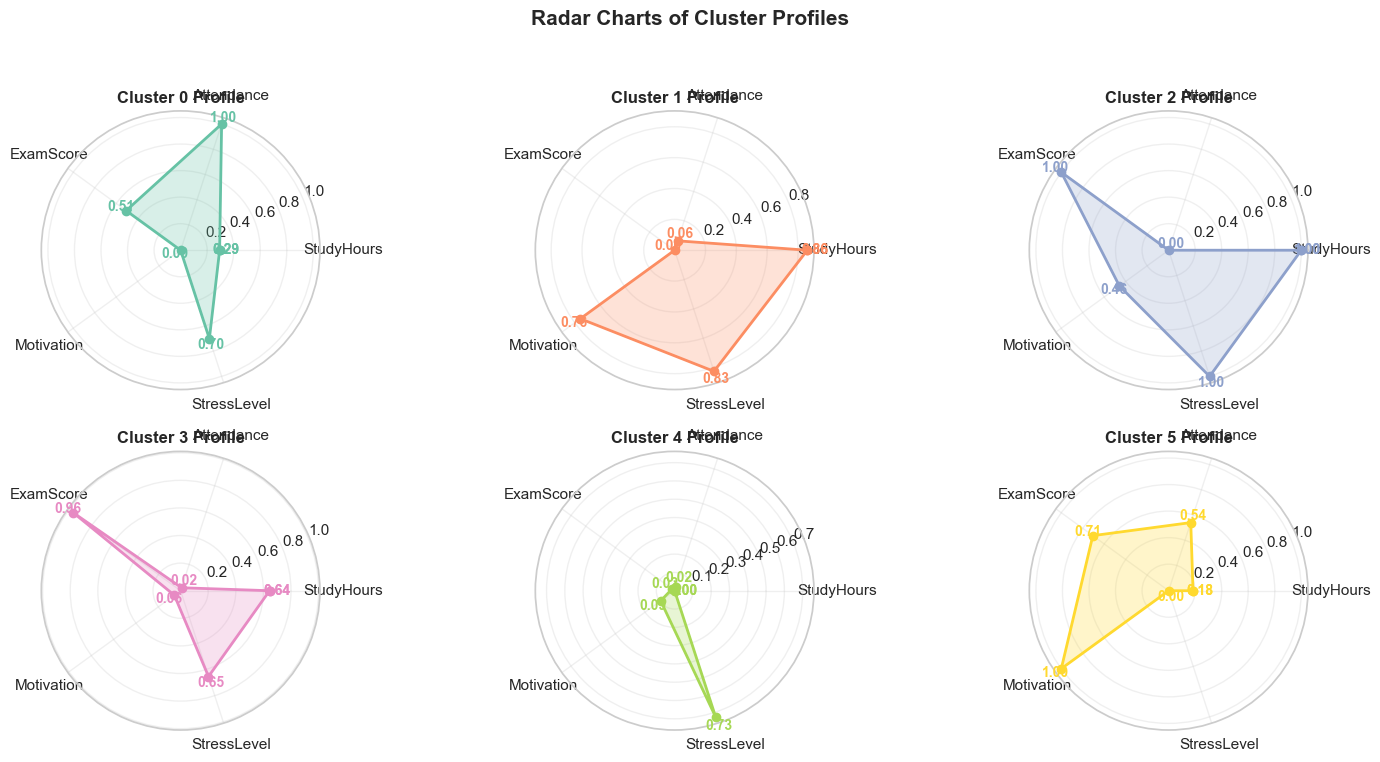

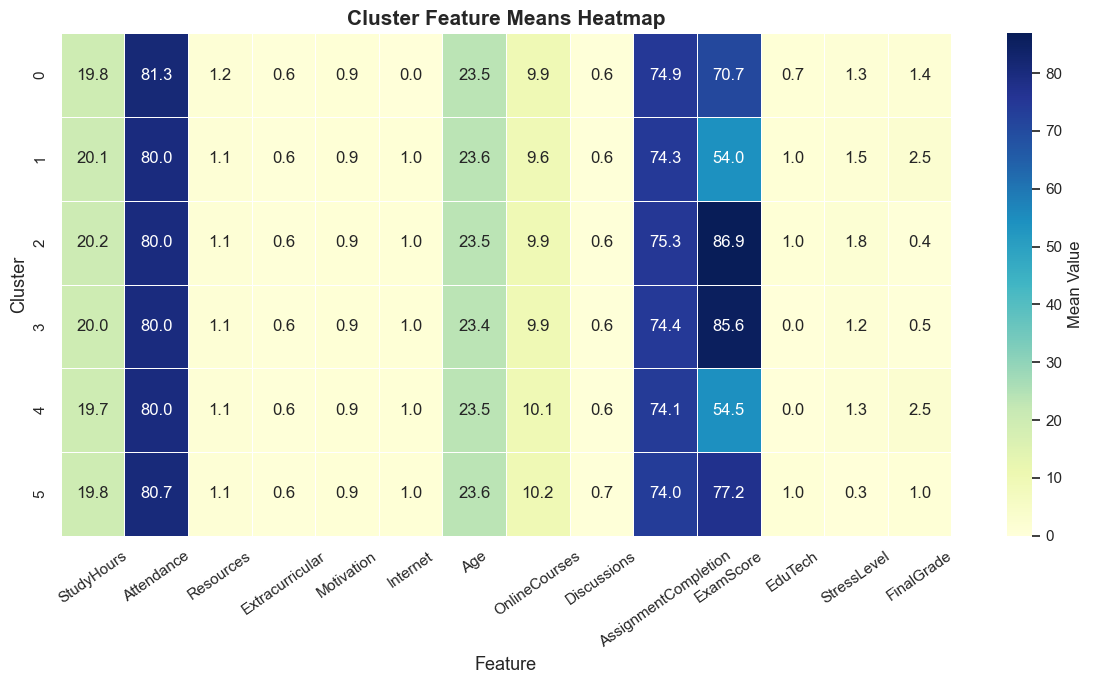

,Criterion,High,Moderate,Low
0,Effectiveness,"Silhouette Score > 0.5, clear cluster separation","Silhouette Score 0.3-0.5, some overlap","Silhouette Score < 0.3, poor separation"
1,Interpretability,Distinct behavioral/feature profiles,"Some patterns, moderate distinction","Unclear patterns, high overlap"
2,Practical Application,Actionable recommendations,Some actionable insights,Limited practical value


In [35]:
# Data Preparation
feature_columns = [
    'StudyHours', 'Attendance', 'Resources', 'Extracurricular', 'Motivation', 'Internet',
    'Age', 'OnlineCourses', 'Discussions', 'AssignmentCompletion', 'ExamScore',
    'EduTech', 'StressLevel', 'FinalGrade'
]
df = pd.read_csv('merged_dataset.csv')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_columns])

# Elbow Method
k_range_inertia = range(1, 11)
inertias = []
for k in k_range_inertia:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(list(k_range_inertia), inertias, marker='o', color='#0072B2', linewidth=2)
plt.xlabel('Number of Clusters (k)', fontsize=13)
plt.ylabel('Inertia (WCSS)', fontsize=13)
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=15, fontweight='bold')
plt.axvline(x=6, color='#D55E00', linestyle='--', linewidth=2, label='Chosen k=6')
plt.xticks(list(k_range_inertia), fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Silhouette Score
k_range_silhouette = range(2, 11)
silhouette_scores = []
for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(7, 5))
plt.plot(list(k_range_silhouette), silhouette_scores, marker='o', color='#009E73', linewidth=2)
plt.xlabel('Number of Clusters (k)', fontsize=13)
plt.ylabel('Average Silhouette Score', fontsize=13)
plt.title('Silhouette Analysis for Optimal Number of Clusters', fontsize=15, fontweight='bold')
plt.axvline(x=6, color='#D55E00', linestyle='--', linewidth=2, label='Chosen k=6')
plt.xticks(list(k_range_silhouette), fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Final Clustering
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = labels

# Radar Data Preparation
radar_features = ['StudyHours', 'Attendance', 'ExamScore', 'Motivation', 'StressLevel']
radar_data = df.groupby('Cluster')[radar_features].mean()
scaler_radar = MinMaxScaler()
radar_data_norm = scaler_radar.fit_transform(radar_data)
palette = sns.color_palette("Set2", 6)
angles = np.linspace(0, 2*np.pi, len(radar_features), endpoint=False).tolist()
angles += angles[:1]

# 1) Six separate radar charts (one per cluster)
for cluster_id in range(6):
    plt.figure(figsize=(6, 5))
    values = radar_data_norm[cluster_id].tolist()
    values += values[:1]
    ax = plt.subplot(1, 1, 1, polar=True)
    ax.plot(angles, values, 'o-', linewidth=2, color=palette[cluster_id], label=f'Cluster {cluster_id}')
    ax.fill(angles, values, alpha=0.25, color=palette[cluster_id])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(radar_features, fontsize=12)
    ax.set_title(f'Cluster {cluster_id}', fontsize=15, fontweight='bold', pad=20)
    ax.grid(alpha=0.3)
    for angle, value in zip(angles, values):
        ax.text(angle, value + 0.05, f"{value:.2f}", ha='center', va='center', fontsize=11, color=palette[cluster_id], fontweight='bold')
    plt.tight_layout()
    plt.show()

# 2) Global radar chart subplot with all 6 clusters
plt.figure(figsize=(15, 8))
for i in range(6):
    values = radar_data_norm[i].tolist()
    values += values[:1]
    ax = plt.subplot(2, 3, i+1, polar=True)
    ax.plot(angles, values, 'o-', linewidth=2, color=palette[i], label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.25, color=palette[i])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(radar_features, fontsize=11)
    ax.set_title(f'Cluster {i} Profile', fontsize=12, fontweight='bold')
    ax.grid(alpha=0.3)
    for angle, value in zip(angles, values):
        ax.text(angle, value + 0.05, f"{value:.2f}", ha='center', va='center', fontsize=10, color=palette[i], fontweight='bold')
plt.suptitle('Radar Charts of Cluster Profiles', fontsize=15, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Heatmap of All Feature Means by Cluster
plt.figure(figsize=(12, 7))
all_means = df.groupby('Cluster')[feature_columns].mean()
sns.heatmap(all_means, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=0.5, cbar_kws={'label': 'Mean Value'})
plt.title('Cluster Feature Means Heatmap', fontsize=15, fontweight='bold')
plt.ylabel('Cluster', fontsize=13)
plt.xlabel('Feature', fontsize=13)
plt.xticks(fontsize=11, rotation=35)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# Table 3: Criteria (as DataFrame)
criteria = {
    "Criterion": ["Effectiveness", "Interpretability", "Practical Application"],
    "High": [
        "Silhouette Score > 0.5, clear cluster separation",
        "Distinct behavioral/feature profiles",
        "Actionable recommendations"
    ],
    "Moderate": [
        "Silhouette Score 0.3-0.5, some overlap",
        "Some patterns, moderate distinction",
        "Some actionable insights"
    ],
    "Low": [
        "Silhouette Score < 0.3, poor separation",
        "Unclear patterns, high overlap",
        "Limited practical value"
    ]
}
criteria_df = pd.DataFrame(criteria)
display(criteria_df)


In [19]:

# Example: 'ExamScore' by 'Cluster'
model = ols('ExamScore ~ C(Cluster)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
ss_between = anova_table['sum_sq'][0]
ss_total = sum(anova_table['sum_sq'])
eta_squared = ss_between / ss_total
print(f"Eta squared (η²) for ExamScore by Cluster: {eta_squared:.3f}")

import numpy as np
import scipy.stats as stats

def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Example: Association between 'Cluster' and a categorical variable, e.g. 'Gender'
contingency = pd.crosstab(df['Cluster'], df['Gender'])
cramers_v_value = cramers_v(contingency)
print(f"Cramér’s V between Cluster and Gender: {cramers_v_value:.3f}")

import scipy.stats as stats

def mean_ci(series, confidence=0.95):
    n = len(series)
    mean = np.mean(series)
    sem = stats.sem(series)
    h = sem * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean-h, mean+h

# Example: Confidence interval for ExamScore in each cluster
for cluster in sorted(df['Cluster'].unique()):
    mean, lower, upper = mean_ci(df[df['Cluster'] == cluster]['ExamScore'])
    print(f"Cluster {cluster}: mean={mean:.2f}, 95% CI=({lower:.2f}, {upper:.2f})")

Eta squared (η²) for ExamScore by Cluster: 0.670
Cramér’s V between Cluster and Gender: 0.049
Cluster 0: mean=70.67, 95% CI=(69.61, 71.72)
Cluster 1: mean=53.96, 95% CI=(53.69, 54.23)
Cluster 2: mean=86.87, 95% CI=(86.57, 87.18)
Cluster 3: mean=85.65, 95% CI=(85.25, 86.05)
Cluster 4: mean=54.51, 95% CI=(54.11, 54.92)
Cluster 5: mean=77.20, 95% CI=(76.69, 77.71)


,Gender,Cluster,Mean ExamScore,95% CI Lower,95% CI Upper
0,0,0,69.86,68.30,71.42
1,0,1,54.01,53.61,54.42
2,0,2,86.81,86.33,87.30
3,0,3,85.78,85.20,86.35
4,0,4,54.98,54.35,55.61
5,0,5,77.20,76.46,77.94
6,1,0,71.36,69.93,72.79
7,1,1,53.91,53.55,54.28
8,1,2,86.92,86.52,87.31
9,1,3,85.53,84.98,86.08


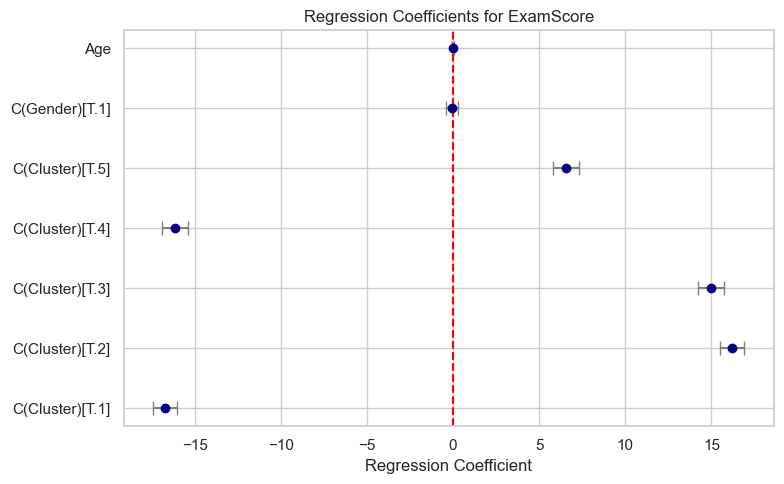

In [36]:
# Load data
df = pd.read_csv('merged_dataset.csv')

# Create clusters
feature_columns = [
    'StudyHours', 'Attendance', 'Resources', 'Extracurricular', 'Motivation', 'Internet',
    'Age', 'OnlineCourses', 'Discussions', 'AssignmentCompletion', 'ExamScore',
    'EduTech', 'StressLevel', 'FinalGrade'
]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_columns])
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Stratified Means and Confidence Intervals Table (by Gender and Cluster)
def mean_ci(series, confidence=0.95):
    n = len(series)
    mean = np.mean(series)
    sem = stats.sem(series)
    h = sem * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean-h, mean+h

rows = []
for gender in df['Gender'].unique():
    group = df[df['Gender'] == gender]
    for cluster in sorted(group['Cluster'].unique()):
        mean, lower, upper = mean_ci(group[group['Cluster'] == cluster]['ExamScore'])
        rows.append({
            'Gender': gender,
            'Cluster': cluster,
            'Mean ExamScore': f"{mean:.2f}",
            '95% CI Lower': f"{lower:.2f}",
            '95% CI Upper': f"{upper:.2f}"
        })
table = pd.DataFrame(rows)
display(table)

# Regression Analysis
model = smf.ols('ExamScore ~ C(Cluster) + C(Gender) + Age', data=df).fit()

# Regression Coefficient Plot
coefs = model.params
conf = model.conf_int()
conf.columns = ['CI Lower', 'CI Upper']
coef_df = pd.concat([coefs, conf], axis=1).reset_index()
coef_df.columns = ['Variable', 'Coefficient', 'CI Lower', 'CI Upper']
coef_df = coef_df[coef_df['Variable'] != 'Intercept']

plt.figure(figsize=(8, 5))
plt.errorbar(coef_df['Coefficient'], coef_df['Variable'],
             xerr=[coef_df['Coefficient'] - coef_df['CI Lower'], coef_df['CI Upper'] - coef_df['Coefficient']],
             fmt='o', color='navy', ecolor='gray', capsize=5)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Regression Coefficient')
plt.title('Regression Coefficients for ExamScore')
plt.tight_layout()
plt.show()
